In [1]:
# !pip install tensorflow 
# !pip install prophet
# !pip install pandas
# !pip install matplotlib
# !pip install prophet
# !pip install sklearn
# !pip install statsmodel

In [2]:
# Link to dataset downloaded and refferenced in code:
# https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs?resource=download

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("archive/Stocks/aapl.us.txt")
df = df.iloc[:,:-1]

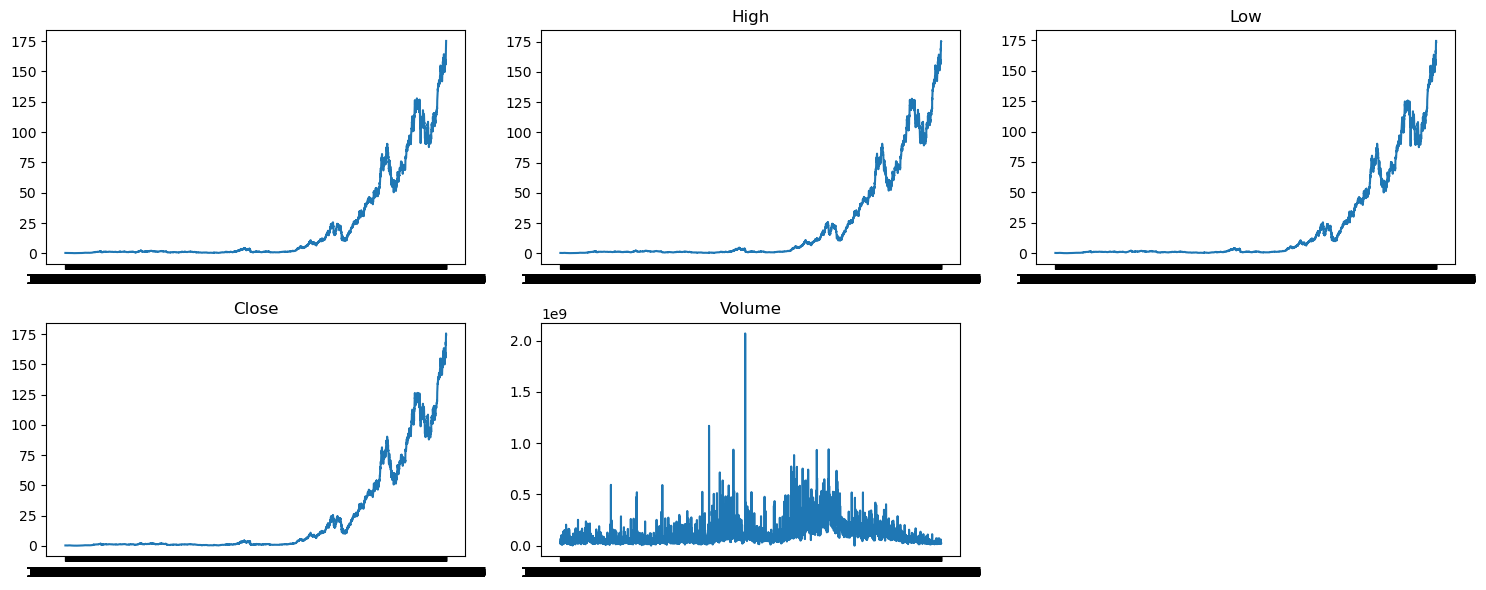

In [3]:
# Simple Data Display:

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a 2x3 grid of subplots
plt.subplot(2, 3, 1)
plt.plot(df['Date'], df['Open'])

plt.subplot(2, 3, 2)
plt.plot(df['Date'], df['High'])
plt.title('High')

plt.subplot(2, 3, 3)
plt.plot(df['Date'], df['Low'])
plt.title('Low')

plt.subplot(2, 3, 4)
plt.plot(df['Date'], df['Close'])
plt.title('Close')

plt.subplot(2, 3, 5)
plt.plot(df['Date'], df['Volume'])
plt.title('Volume')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
# Calculate the Moving Average for Open price over the last 5 days
df['MA_Open_5'] = df['Open'].rolling(5).mean()

# Calculate the Moving Average for Close price over the last 5 days
df['MA_Close_5'] = df['Close'].rolling(5).mean()

# Calculate the Moving Average for Volume over the last 5 days
df['MA_Volume_5'] = df['Volume'].rolling(5).mean()

# Calculate the Relative Strength Index over the last 14 days
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# Calculate the Commodity Channel Index over the last 20 days
tp = (df['High'] + df['Low'] + df['Close']) / 3
ma = tp.rolling(20).mean()
dev = (tp - ma).abs().rolling(20).mean()
cci = (tp - ma) / (0.015 * dev)
df['CCI_20'] = cci

# Calculate the Exponential Moving Average for Close price over the last 10 days
df['EMA_Close_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Calculate the Bollinger Bands over the last 20 days
sma = df['Close'].rolling(20).mean()
std = df['Close'].rolling(20).std()
df['BB_upper_20'] = sma + 2 * std
df['BB_lower_20'] = sma - 2 * std

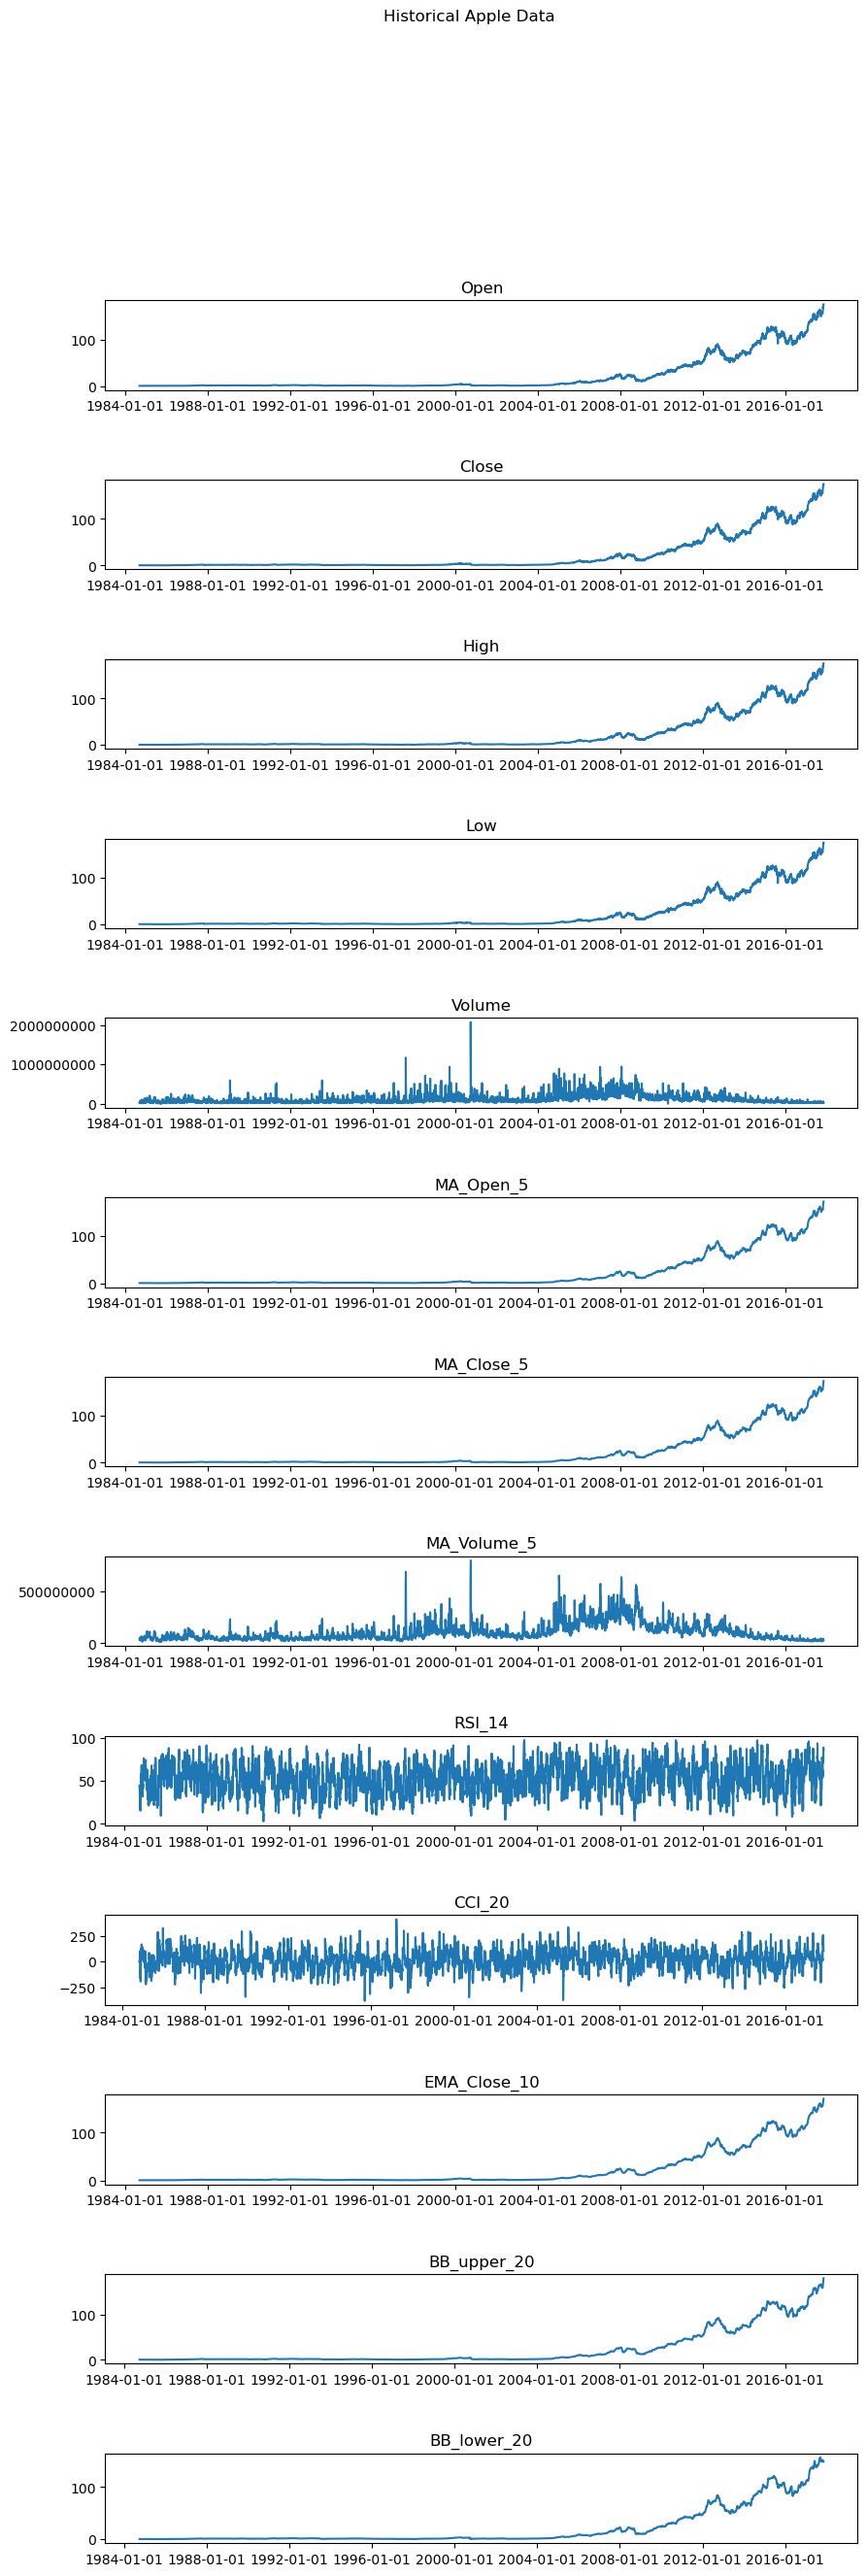

In [5]:
import matplotlib.dates as mdates

# convert date column to datetime format
df['datetime'] = pd.to_datetime(df['Date'])

# create subplots
fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(10, 30))

fig.subplots_adjust(hspace=1,wspace=1)

# iterate over features and plot each one
for i, feature in enumerate(['Open', 'Close', 'High', 'Low', 'Volume', 
                             'MA_Open_5', 'MA_Close_5', 'MA_Volume_5', 'RSI_14', 'CCI_20',
                            'EMA_Close_10', 'BB_upper_20', 'BB_lower_20']):
    ax = axes[i]
    ax.plot(df['datetime'], df[feature])
    # ax.set_xlabel('Date')
    #ax.set_ylabel(feature)
    ax.ticklabel_format(style='plain', axis='y', scilimits=(0,0), useOffset=False)
    ax.set_title(feature)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# add title to the figure
fig.suptitle('Historical Apple Data')
plt.show()

In [6]:
# import pandas as pd

# # Read in the CSV file with Date and Close columns
# df = pd.read_csv('archive/Stocks/aapl.us.txt')

# # Convert Date column to datetime object and set as index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Resample the data to include all dates in the time range
# resampled_df = df.resample('B').asfreq()

# # Find the missing dates
# print(df.index)
# missing_dates = resampled_df.index.difference(df.index)
# print(missing_dates)

In [7]:
# # Importing required libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# def add_freq(idx, freq=None):
#     """Add a frequency attribute to idx, through inference or directly.

#     Returns a copy.  If `freq` is None, it is inferred.
#     """

#     idx = idx.copy()
#     if freq is None:
#         if idx.freq is None:
#             freq = pd.infer_freq(idx)
#         else:
#             return idx
#     idx.freq = pd.tseries.frequencies.to_offset(freq)
#     if idx.freq is None:
#         raise AttributeError('no discernible frequency found to `idx`.  Specify'
#                              ' a frequency string with `freq`.')
#     return idx



arima_data = df.loc[:,['Date','Close']]
arima_data['Date'] = pd.to_datetime(arima_data['Date'])


arima_data.set_index('Date',inplace=True)

# print(arima_data.asfreq('B').index)
# arima_data.index.freq='B'

train_data, test_data = train_test_split(arima_data,test_size=0.1)

# Building the ARIMA model
model = ARIMA(train_data['Close'], order=(1,1,1))
model_fit = model.fit()

# Making predictions on the test data
predictions = model_fit.forecast(len(test_data))

# Evaluating the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data, predictions)
print("MAE: ", mae)

# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA

# # Load data from CSV file
# df = pd.read_csv('archive/Stocks/aapl.us.txt')

# # Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# # Set 'Date' column as index
# df.set_index('Date', inplace=True)
# #df.index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')

# # Extract 'Close' column for ARIMA model
# close_price = df['Close']

# # Create ARIMA model
# model = ARIMA(close_price, order=(1,1,1))
# result = model.fit()

# # Print model summary
# print(result.summary())

C:\Users\0king\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\0king\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\0king\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\0king\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\0king\anaconda3\lib\site-

MAE:  29.00200098852444


C:\Users\0king\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
# Importing required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

# Reading data from CSV file into a pandas dataframe
df = pd.read_csv('archive/Stocks/aapl.us.txt', parse_dates=['Date'], index_col='Date')

# Splitting data into train and test sets
train_data = df[:'2000-12-31']
test_data = df['2001-01-01':]

# Scaling the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Preparing the data for LSTM
X_train = []
y_train = []
for i in range(60, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Preparing the data for predictions
inputs = df[len(df) - len(test_data) - 60:].values
#display(inputs)
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

# Reshaping the data for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluating the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data, predictions)
print("MAE: ", mae)

805/805 [==============================] - 13s 16ms/step


ValueError: Found input variables with inconsistent numbers of samples: [4241, 25746]

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data into a Pandas dataframe
data = pd.read_csv('archive/Stocks/aapl.us.txt')

# Prepare the data for Prophet
data = data.rename(columns={'Date': 'ds', 'Value': 'y'})

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Generate predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
df = pd.read_csv('archive/Stocks/aapl.us.txt')

# Set the date as the index of the dataframe
df.set_index('Date', inplace=True)

# Define the number of time steps for the LSTM model
n_steps = 30

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Create the training data for the LSTM model
X_train, y_train = [], []
for i in range(n_steps, train_data.shape[0]):
    X_train.append(train_data[i-n_steps:i])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data for the LSTM model
X_test, y_test = [], []
for i in range(n_steps, test_data.shape[0]):
    X_test.append(test_data[i-n_steps:i])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the LSTM model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the LSTM model on the testing data
loss = model.evaluate(X_test, y_test)

# Make predictions with the LSTM model
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print("MAE: ", mae)

Epoch 1/50
209/209 [==============================] - 9s 25ms/step - loss: 0.0012
Epoch 2/50
209/209 [==============================] - 5s 24ms/step - loss: 2.1529e-04
Epoch 3/50
209/209 [==============================] - 5s 24ms/step - loss: 1.4485e-04
Epoch 4/50
209/209 [==============================] - 5s 24ms/step - loss: 1.4231e-04
Epoch 5/50
209/209 [==============================] - 5s 25ms/step - loss: 1.1766e-04
Epoch 6/50
209/209 [==============================] - 6s 26ms/step - loss: 1.0164e-04
Epoch 7/50
209/209 [==============================] - 6s 26ms/step - loss: 9.0277e-05
Epoch 8/50
209/209 [==============================] - 5s 25ms/step - loss: 7.5106e-05
Epoch 9/50
209/209 [==============================] - 5s 24ms/step - loss: 1.0991e-04
Epoch 10/50
209/209 [==============================] - 5s 24ms/step - loss: 7.3779e-05
Epoch 11/50
209/209 [==============================] - 5s 24ms/step - loss: 6.8716e-05
Epoch 12/50
209/209 [==============================] - 5